In [21]:
# Problem 1
import numpy as np
import matplotlib.pyplot as plt
mu0 = np.array([[1],[0]])
sigma0 = [[8,3],[3,2]]

mu1 = np.array([[0],[2]])
sigma1 = [[1,0.1],[0.1,1]]

n = 10000

###
X0 = np.linalg.cholesky(sigma0)@np.random.randn(2,n) + mu0
X1 = np.linalg.cholesky(sigma1)@np.random.randn(2,n) + mu1


### 
c = np.log(np.linalg.det(sigma0)) - np.log(np.linalg.det(sigma1)) \
    + mu0.T@np.linalg.inv(sigma0)@mu0 - mu1.T@np.linalg.inv(sigma1)@mu1
w = 2*(np.linalg.inv(sigma0)@mu0 - np.linalg.inv(sigma1)@mu1)
B = np.linalg.inv(sigma1) - np.linalg.inv(sigma0)

print(c)
print(w)
print(B)

[[-1.79872927]]
[[ 0.97546898]
 [-4.8975469 ]]
[[ 0.72438672  0.32756133]
 [ 0.32756133 -0.13275613]]


In [22]:
#4d 
results = []
c_vals = np.linspace(-10,10,100)

for c in c_vals:
    type_0_errors = 0
    for x in X0.T:
        x = x.T
        if x.T@B@x + w.T@x < c:
            type_0_errors +=1
    #print('errors when y=0:', type_0_errors/10000)

    type_1_errors = 0
    for x in X1.T:
        x = x.T
        if x.T@B@x + w.T@x > c:
            type_1_errors +=1
    #print('errors when y=1:', type_1_errors/10000)
    #print('total error rate', (type_0_errors + type_1_errors)/20000)
    results.append((c, type_1_errors, type_0_errors))

Text(0, 0.5, '$P(\\widehat{y}=0 |y = 1)$')

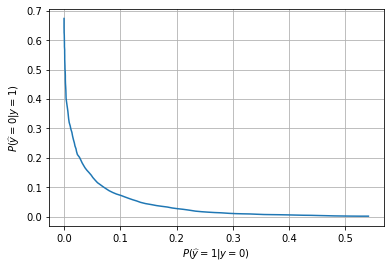

In [23]:
np_res = np.array(results)

plt.plot(np_res[:,1]/n,np_res[:,2]/n)
plt.grid()
plt.xlabel('$P(\widehat{y}=1 |y = 0)$')
plt.ylabel('$P(\widehat{y}=0 |y = 1)$')